# Distributions
This section shows how to use the `Distributions` functionality of Episuite.

In [1]:
import pandas as pd
import numpy as np
import episuite
from matplotlib import pyplot as plt
import seaborn as sns

from episuite import durations
from episuite import distributions
from episuite import data

In [2]:
sample_data = data.admissions_sample()

In [3]:
sample_data.head()

,DATE_START,DATE_END,OUTCOME
0,2020-06-17,2020-08-03,RECOVERY
1,2020-06-11,2020-06-21,DEATH
2,2020-07-12,2020-08-02,DEATH
3,2020-06-25,2020-07-31,DEATH
4,2020-07-24,2020-08-16,DEATH


In [4]:
dur = durations.Durations(sample_data)

In [5]:
duration_bootstrap = distributions.DurationBootstrap.from_durations(dur)

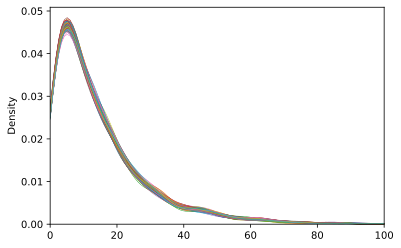

In [6]:
for i in range(100):
    sns.kdeplot(duration_bootstrap.sample(), alpha=0.05, lw=0.5, cut=0)
plt.xlim(0, 100)
plt.show()